In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [104]:
data = pd.read_csv('clean_tables/3_ready_to_train/df_continuous_dx')

In [105]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LWMV', 'DX'],
      dtype='object')

In [106]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['APOE4'] = label_encoder.fit_transform(data['APOE4'])
data['family_dementia_history'] = label_encoder.fit_transform(data['family_dementia_history'])
data['DX'] = label_encoder.fit_transform(data['DX'])

In [107]:
# minmax normalization
scaler = StandardScaler()
data[['age_years', 'years_education', 'ptau_result', 'ttau_result', 'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR']] = scaler.fit_transform(data[['age_years', 'years_education', 'ptau_result', 'ttau_result', 'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR']])

In [108]:
data

,Unnamed: 0.1,Unnamed: 0,sex,age_years,years_education,APOE4,family_dementia_history,ptau_result,ttau_result,abeta42_result,mmse_total,gds_total,cdr_sob,LHVL,LHVR,LWMV,DX
0,0,0,0,-1.562360,-1.277816,0,1,-0.439296,1.477295,0.576246,0.383019,-2.222585,1.646639,-1.694589,-0.516950,-0.723,0
1,1,1,1,0.540129,-1.591885,2,1,0.285095,0.234091,1.499567,-0.376715,-0.335247,-0.950692,0.273834,0.015974,0.000,1
2,2,2,0,-0.721364,-0.335610,0,1,-0.055149,-0.007643,0.694059,0.003152,0.009734,-0.258070,-0.628317,-0.649693,0.210,0
3,4,4,1,-1.141862,1.234734,2,1,-1.350274,-0.375999,-0.160766,1.902488,-0.335247,0.607707,-0.897151,-0.144098,-0.827,0
4,5,5,0,0.876527,1.234734,2,1,2.315587,0.326181,0.483092,0.762887,0.797156,-1.123848,-0.007081,-0.671166,0.379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,893,893,1,1.128826,-1.277816,0,1,-0.538077,-1.412002,1.222845,-0.756582,0.009734,0.954018,-0.436006,-0.140194,1.246,0
725,894,894,0,0.287830,0.920665,0,1,0.361925,1.051383,0.195411,-1.516317,0.419689,0.261396,1.352188,0.657240,0.554,0
726,897,897,1,0.960627,-0.649679,1,1,0.153388,2.064363,1.499567,0.003152,2.684494,0.780862,0.358411,1.271177,-1.433,0
727,898,898,1,0.035532,0.292528,1,1,0.658267,1.131961,-1.089567,-0.756582,1.929559,1.646639,0.485276,-0.100176,1.524,0


In [119]:
# Select features and target variable
X = data[['sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'LHVL', 'LHVR',
       'LWMV']]
y = data['DX']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train.shape

(583, 13)

In [121]:
X_test.shape

(146, 13)

In [122]:
y_train.shape

(583,)

In [123]:
y_test.shape

(146,)

In [124]:
y_train.value_counts()

DX
0    340
1    138
2    105
Name: count, dtype: int64

In [125]:
y_test.value_counts()

DX
0    100
1     26
2     20
Name: count, dtype: int64

c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.678082191780822
Confusion Matrix:
 [[99  1  0]
 [26  0  0]
 [20  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81       100
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        20

    accuracy                           0.68       146
   macro avg       0.23      0.33      0.27       146
weighted avg       0.47      0.68      0.55       146



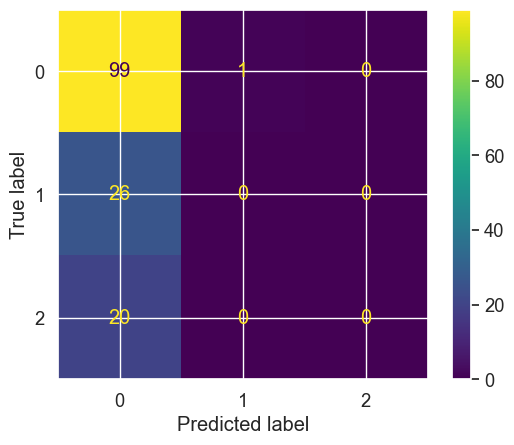

In [126]:
# Random Forest as an example
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.678082191780822
Confusion Matrix:
 [[99  1  0]
 [26  0  0]
 [20  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81       100
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        20

    accuracy                           0.68       146
   macro avg       0.23      0.33      0.27       146
weighted avg       0.47      0.68      0.55       146



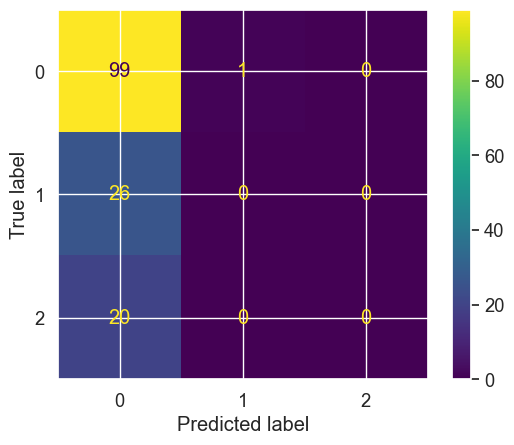

In [127]:
# Naive_bayes as an example
model_nb = GaussianNB()

# Train the model
model_nb.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anaso\anaconda3\envs\ml_alzheimer\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.678082191780822
Confusion Matrix:
 [[99  1  0]
 [26  0  0]
 [20  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81       100
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        20

    accuracy                           0.68       146
   macro avg       0.23      0.33      0.27       146
weighted avg       0.47      0.68      0.55       146



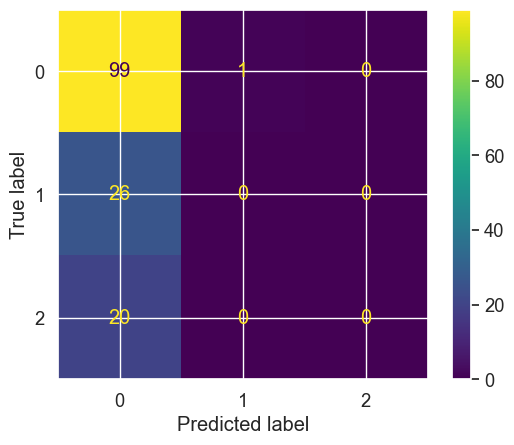

In [128]:
# MLP
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

# Train the model
model_mlp.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

In [129]:
feature_importances = model.feature_importances_
feature_names = X_train.columns  # Assuming X is your feature matrix

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df

,Feature,Importance
0,sex,0.023235
1,age_years,0.094707
2,years_education,0.060202
3,APOE4,0.030232
4,family_dementia_history,0.018118
5,ptau_result,0.096292
6,ttau_result,0.103887
7,abeta42_result,0.083615
8,mmse_total,0.079632
9,gds_total,0.062007


# Categorical variables

In [130]:
data = pd.read_csv('clean_tables/3_ready_to_train/df_categorical_dx')

In [131]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression', 'cdr_sob', 'LHVL', 'LHVR', 'VASCULAR',
       'DX'],
      dtype='object')

In [132]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['family_dementia_history'] = label_encoder.fit_transform(data['family_dementia_history'])
data['AMYL'] = label_encoder.fit_transform(data['AMYL'])
data['TAUO'] = label_encoder.fit_transform(data['TAUO'])
data['NEUROD'] = label_encoder.fit_transform(data['NEUROD'])
data['Depression'] = label_encoder.fit_transform(data['Depression'])
data['VASCULAR'] = label_encoder.fit_transform(data['VASCULAR'])
data['DX'] = label_encoder.fit_transform(data['DX'])

In [133]:
scaler = StandardScaler()
data[['age_years', 'years_education', 'mmse_total', 'cdr_sob', 'LHVL', 'LHVR']] = scaler.fit_transform(data[['age_years', 'years_education', 'mmse_total', 'cdr_sob', 'LHVL', 'LHVR']])

In [134]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sex', 'age_years', 'years_education',
       'APOE4', 'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression', 'cdr_sob', 'LHVL', 'LHVR', 'VASCULAR',
       'DX'],
      dtype='object')

In [139]:
# Select features and target variable
X = data[['sex', 'age_years', 'years_education', 'APOE4', 'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression', 'cdr_sob', 'LHVL', 'LHVR', 'VASCULAR']]
y = data['DX']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

Accuracy: 1.0
Confusion Matrix:
 [[88  0  0]
 [ 0 36  0]
 [ 0  0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        22

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



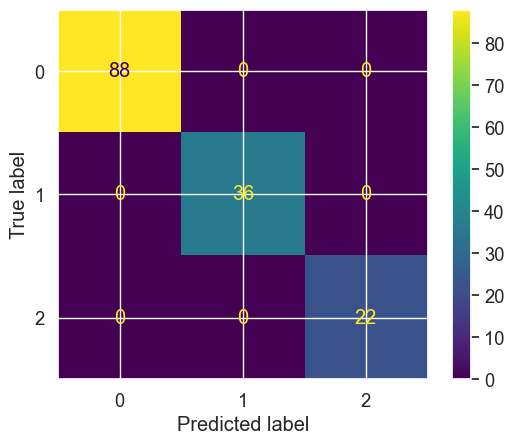

In [140]:
# Random Forest as an example
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

cm_display =ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cm_display.plot(values_format='d')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)

In [141]:
feature_importances = model.feature_importances_
feature_importances

array([0.01294561, 0.04047347, 0.02551358, 0.01111578, 0.00649239,
       0.00359914, 0.00472973, 0.00953221, 0.02873621, 0.00414827,
       0.76210026, 0.04494932, 0.04113607, 0.00452795])

In [143]:
feature_names = X_train.columns  # Assuming X is your feature matrix

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df

,Feature,Importance
0,sex,0.012946
1,age_years,0.040473
2,years_education,0.025514
3,APOE4,0.011116
4,family_dementia_history,0.006492
5,AMYL,0.003599
6,TAUO,0.004730
7,NEUROD,0.009532
8,mmse_total,0.028736
9,Depression,0.004148


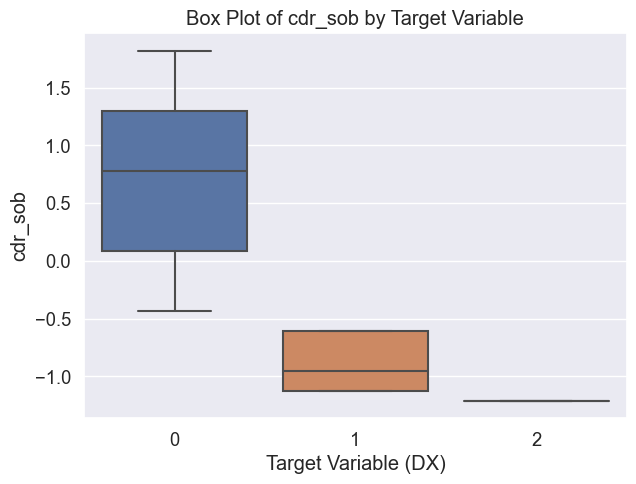

In [160]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=data['DX'], y=data['cdr_sob'])
plt.xlabel('Target Variable (DX)')
plt.ylabel('cdr_sob')
plt.title('Box Plot of cdr_sob by Target Variable')
plt.show()


In [169]:
from scipy import stats

correlation, p_value = stats.pointbiserialr(data['DX'], data['cdr_sob'])
print(f'Correlation: {correlation}')
print(f'p-value: {p_value}')

f_statistic, p_value = stats.f_oneway(data['DX'], data['cdr_sob'])
print(f'F statistic: {f_statistic}')

Correlation: -0.79617079715339
p-value: 8.777612033567863e-161
F statistic: 147.8215142500719


## So we can't use cdr_total because its highly correlated to the target variable!

### we can test the other variables

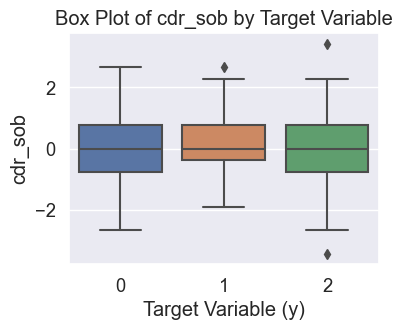

In [170]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=data['DX'], y=data['mmse_total'])
plt.xlabel('Target Variable (y)')
plt.ylabel('cdr_sob')
plt.title('Box Plot of cdr_sob by Target Variable')
plt.show()


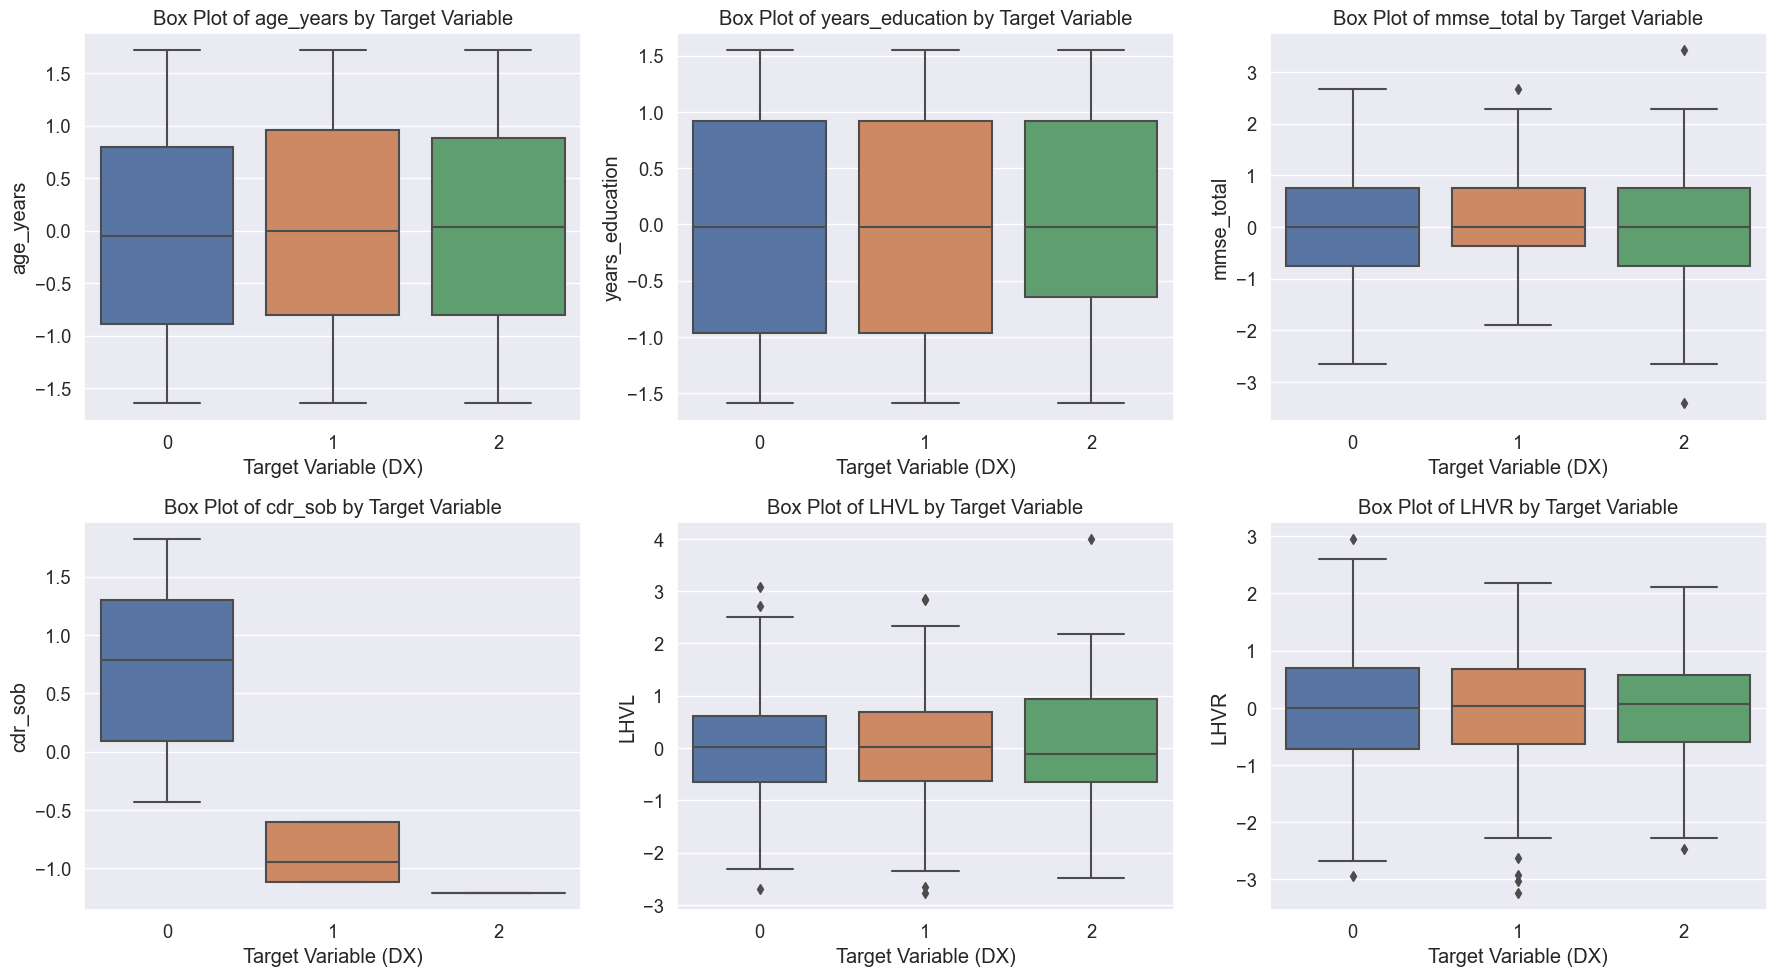

In [172]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Variables you want to plot
variables = ['age_years', 'years_education', 'mmse_total', 'cdr_sob', 'LHVL', 'LHVR']

# Loop through the variables and create box plots in each subplot
for i, var in enumerate(variables):
    row, col = i // 3, i % 3
    sns.boxplot(x=data['DX'], y=data[var], ax=axes[row, col])
    axes[row, col].set_xlabel('Target Variable (DX)')
    axes[row, col].set_ylabel(var)
    axes[row, col].set_title(f'Box Plot of {var} by Target Variable')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
